## Constante de gravitación universal G

### Importe y tratamiento de datos

In [34]:
# -*- coding: utf-8 -*-

In [35]:
import pandas as pd
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv('data_1.csv', delimiter=' ', decimal=',')
df.columns=['Tiempo','Ángulo']
df['Ángulo']=df['Ángulo']+np.pi-(0.0234)
df['Tiempo']=df['Tiempo']*10
df

,Tiempo,Ángulo
0,0.00,0.000193
1,0.83,0.000193
2,1.66,0.000193
3,2.50,0.000193
4,3.33,0.000193
...,...,...
1035,874.62,-0.014807
1036,875.45,-0.013807
1037,876.28,-0.012807
1038,877.11,-0.011807


In [37]:
df.describe()

,Tiempo,Ángulo
count,1040.000000,1040.000000
mean,432.945808,0.008136
std,250.983319,0.118712
min,0.000000,-0.155807
25%,216.162500,-0.116807
50%,432.315000,0.014193
75%,648.470000,0.129443
max,877.950000,0.174193


### Gráfica del desplazamiento angular en función del tiempo.

Text(530, 0.115, '$Amplitud=0.16$ $rad$')

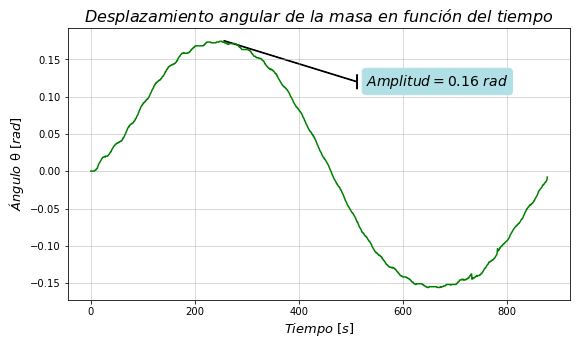

In [94]:
plt.figure(figsize=[9,5])
plt.plot(df['Tiempo'], df['Ángulo'], 'g')
plt.grid(alpha=0.6)
plt.title('$Desplazamiento$ $angular$ $de$ $la$ $masa$ $en$ $función$ $del$ $tiempo$', size=16)
plt.xlabel('$Tiempo$ $[s]$', size=13)
plt.ylabel('$Ángulo$ θ $[rad]$', size=13)
length=0.02
plt.arrow(256, 0.175, 256, -0.055, head_width=0.02, head_length=length)
plt.text(530, 0.115, '$Amplitud=0.16$ $rad$',size=14, bbox={"boxstyle" : "round", "color":"powderblue"})

### Desviación del periodo y el ángulo medidos

In [120]:
df_2=pd.read_csv('t_A.csv', delimiter=' ', decimal=',')
df_2.columns=['Periodo','Amplitud']
A=df_2['Amplitud']
A_prom=round(A.mean(), 3)
A_std=round(A.std(), 3)
print('El valor promedio de la amplitud A es', A_prom, 'mientras que su desviación estándar es ', A_std)
T=df_2['Periodo']*10
T_prom=round(T.mean(), 3)
T_std=round(T.std(), 3)
print('El valor promedio del periodo T es', T_prom, 'mientras que su desviación estándar es ', T_std)

El valor promedio de la amplitud A es 0.409 mientras que su desviación estándar es  0.495
El valor promedio del periodo T es 843.825 mientras que su desviación estándar es  26.164


## Calculando la constante G

$$
  G = \frac{2\pi^2L\theta r^2}{T^2M_2}
$$

In [121]:
T_prom=T_prom*u.s
theta=df['Ángulo'].max() *u.radian
M=50*u.kg
L=1.2*u.m
r=0.12*u.m
G=(2*np.pi**2*L*theta*r**2)/(T_prom**2*M)
print('El valor de la constante Newton-Cavendish es igual a ', np.round(G, 13))

El valor de la constante Newton-Cavendish es igual a  1.6689e-09 m3 rad / (kg s2)


In [122]:
g=(u.radian*u.m**3)/(u.kg*u.s**2)
G_real=6.674*(10**-11)*g
print('El valor encontrado para G difiere de su valor aceptado unas ', np.round(G/G_real, 3),' veces.')

El valor encontrado para G difiere de su valor aceptado unas  25.006  veces.
